# Pymaceuticals Inc.
---

### Analysis

From the Analysis bellow we can find some intersting facts: 

- From the Bar chart we can see Capomulin and Ramicane are mostly tested drug
- From the Box Plot we can understand Capomulin and Ramicane are also most effecting drug for reducing the tumor size. Because final tumol volume in bellow 40 mm3 for thsese two drugs, compared to around 60mm3 for other drugs
- The lineplot for Capomulin drug also proves the same thing. From the line plot we can see how effecticely it reducing the tumor voulme over time.
- From the scatter plot we can see there is linear releationship between the mice weight and tumor volume. With more weight its bigger chance to have a bigger tumor.
 

In [3105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_result = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_study_result.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3106]:
# Checking the number of mice.

mice_count = len(mouse_study_result["Mouse ID"].unique())
mice_count

249

In [3107]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_duplicate = mouse_study_result[mouse_study_result.duplicated()]["Mouse ID"].values
mouse_id_duplicate

array(['g989'], dtype=object)

In [3108]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_result_show_duplicate = mouse_study_result.loc[mouse_study_result["Mouse ID"].isin(mouse_id_duplicate)]
mouse_study_result_show_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_result_no_dup = mouse_study_result.drop(mouse_study_result_show_duplicate.index)
mouse_study_result_no_dup.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3110]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_result_no_dup["Mouse ID"].unique())

248

## Summary Statistics

In [3111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_values = mouse_study_result_no_dup.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_values = mouse_study_result_no_dup.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumor_values = mouse_study_result_no_dup.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_tumor_values = mouse_study_result_no_dup.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor_values = mouse_study_result_no_dup.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

mouse_study_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_values,
    "Median Tumor Volume": median_tumor_values,
    "Tumor Volume Variance": var_tumor_values,
    "Tumor Volume Std. Dev": std_tumor_values,
    "Tumor Volume Std. Err.": sem_tumor_values
})

mouse_study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mouse_study_quick_summary = mouse_study_result_no_dup.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
mouse_study_quick_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0, 0.5, 'Number of Mice Tested'), Text(0.5, 0, 'Drug Regimen')]

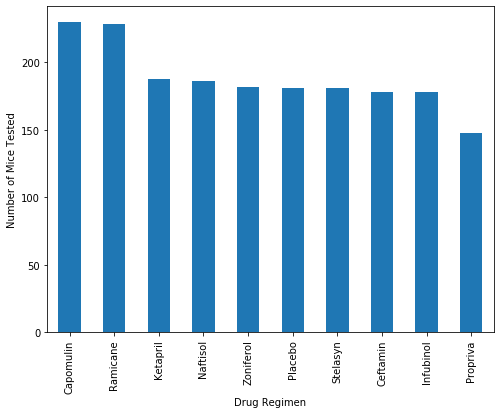

In [3113]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_by_regimen = mouse_study_result_no_dup.groupby('Drug Regimen').agg({"Timepoint": 'count'})
timepoint_by_regimen_sorted = timepoint_by_regimen.sort_values("Timepoint", ascending=False)
timepoint_by_regimen_sorted.plot(kind="bar", figsize=(8,6), legend=False).set(xlabel="Drug Regimen", ylabel="Number of Mice Tested")

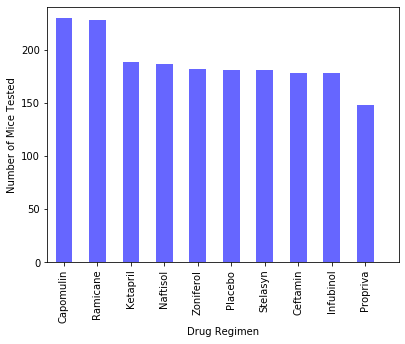

In [3114]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint_by_regimen_sorted))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6.3,4.7))
plt.bar(x_axis, timepoint_by_regimen_sorted["Timepoint"], color='blue', alpha=0.6, width=0.5, align="center")
plt.xticks(tick_locations, timepoint_by_regimen_sorted.index, rotation="vertical")
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(timepoint_by_regimen_sorted["Timepoint"])+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

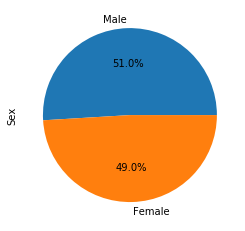

In [3115]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_by_sex = mouse_study_result_no_dup["Sex"].value_counts()
count_by_sex.plot(kind='pie', autopct="%1.1f%%")

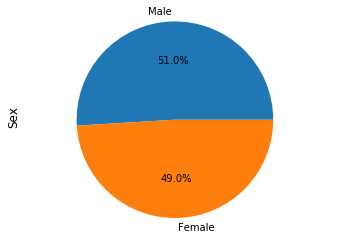

In [3116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_by_sex.values, labels=count_by_sex.index, autopct="%1.1f%%")
plt.title("Sex", loc="left", y=0.45, rotation = 90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [3117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_study = mouse_study_result_no_dup.loc[mouse_study_result_no_dup["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
treatment_study_max_timepoint = treatment_study.groupby("Mouse ID").agg({"Timepoint": 'last', "Tumor Volume (mm3)" : "last"}).rename(columns={"Timepoint": "Max Timepoint", "Tumor Volume (mm3)" : "Final Tumor Volume"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_result_with_max_timepoint = mouse_study_result_no_dup.merge(treatment_study_max_timepoint, how="inner", on=["Mouse ID"])

mouse_study_result_with_max_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126
...,...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,45,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,45,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,45,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,45,62.754451


In [3118]:
# Put treatments into a list for for loop (and later for plot labels)

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treament_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    treament_tumor_volume_dup = mouse_study_result_with_max_timepoint.loc[mouse_study_result_with_max_timepoint["Drug Regimen"] == treatment][["Mouse ID","Final Tumor Volume"]]
    treament_tumor_volume = treament_tumor_volume_dup.drop_duplicates()["Final Tumor Volume"]
    # add subset 
    treament_tumor_volumes.append(treament_tumor_volume)
    
    
    # Determine outliers using upper and lower bounds
    treatment_outliers = find_outliers_IQR(treament_tumor_volume)
    print(f"{treatment}'s potential outliers: {treatment_outliers}")
    

Capomulin's potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)
Infubinol's potential outliers: 525    36.321346
Name: Final Tumor Volume, dtype: float64
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)


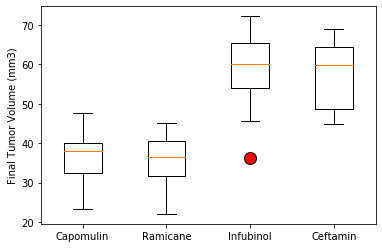

In [3119]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(treament_tumor_volumes, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
ax1.set_xticklabels(treatments, ha='center')
plt.show()


## Line and Scatter Plots

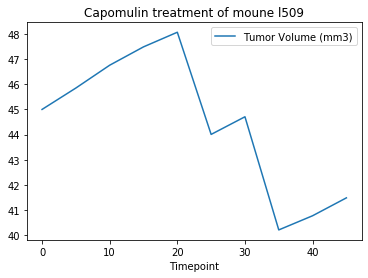

In [3120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_study = mouse_study_result_with_max_timepoint.loc[mouse_study_result_with_max_timepoint["Drug Regimen"] == "Capomulin"]
capomulin_tumor_volume_by_timepoint = capomulin_study.loc[mouse_study_result_with_max_timepoint["Mouse ID"] == "l509"][["Timepoint","Tumor Volume (mm3)"]]
ax2 = capomulin_tumor_volume_by_timepoint.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
ax2.set_title("Capomulin treatment of moune l509")
ax1.set_xlabel('Timepoint (days))')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.yaxis.set_label_position('left')

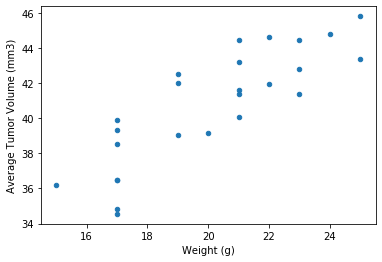

In [3121]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_volume_by_wgt = capomulin_study.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)" : "mean"}).rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
ax2 = avg_tumor_volume_by_wgt.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


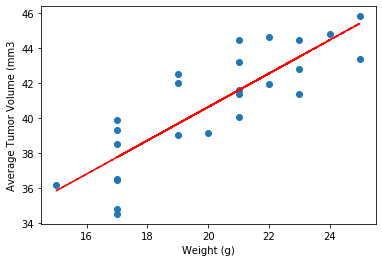

In [3122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_wgt = avg_tumor_volume_by_wgt["Weight (g)"]
avg_tumor_vol = avg_tumor_volume_by_wgt["Average Tumor Volume (mm3)"]
tumor_vol_slope, tumor_vol_int, tumor_vol_r, tumor_vol_p, tumor_vol_std_err = st.linregress(mouse_wgt, avg_tumor_vol)
correlation = st.pearsonr(mouse_wgt, avg_tumor_vol)
tumor_vol_fit = tumor_vol_slope * mouse_wgt + tumor_vol_int
plt.scatter(mouse_wgt,avg_tumor_vol)
plt.plot(mouse_wgt,tumor_vol_fit,"--", color="r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")